In [239]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import pdb

In [344]:
n_dims = 1


lin_func = lambda x: x**2 + 3*x + 5 
x = np.linspace(0, 1, num=10)
y = np.r_[[lin_func(z)+np.random.uniform(0,2,size=1) for z in x]].ravel()

In [345]:
class Linear_func(object):
    """Linear function for regression"""
    def __init__(self, n_d = n_dims):
        self.theta = np.random.uniform(size = n_d+1)
        self.theta_hist = [self.theta.copy()]
        self.grad_hist = []
        
    def __call__(self, x):
        return np.dot(self.theta[1:], x) + self.theta[0]
    
    def fit(self, x, y, lrn_rate = 1e-3, max_iter = 1000, fin_accuracy = 1e-5):
        """method for fitting data with gradient descent"""
        x_ = np.vstack([np.ones_like(x),x]).T
        
        for i in xrange(max_iter):
            grad = np.dot(y - np.dot(x_,self.theta), x_)/ len(y)
            if i % 100 == 0: print grad
            self.theta += lrn_rate * grad
            
            norm = np.linalg.norm(self.theta_hist[-1] - self.theta)
            self.theta_hist.append(self.theta.copy())
            
            if  norm < fin_accuracy: 
                self.theta_hist.append(self.theta.copy())
                print "Aligned on step %d" % i
                break

In [346]:
#take2

In [347]:
f1 = Linear_func(1)

In [348]:
res = [f1(z) for z in x]
# print x
x_ = np.vstack((np.ones_like(x), x)).T
print x_.dot(f1.theta)
# print y

[ 0.23060275  0.30733567  0.38406859  0.46080151  0.53753443  0.61426734
  0.69100026  0.76773318  0.8444661   0.92119902]


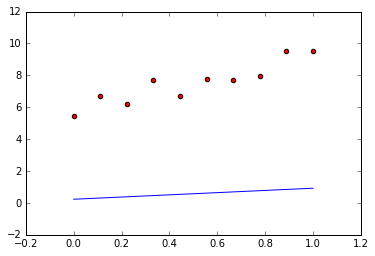

In [349]:
plt.scatter(x,y,c='r')
plt.plot(x,res)

In [350]:
a0 = f1.theta.copy()
print "started"
print f1.theta
print '_______________________________'
f1.fit(x,y, lrn_rate=1e-2, max_iter=1000)
print '_______________________________'
print "finished"
print f1.theta

started
[ 0.23060275  0.69059626]
_______________________________
[ 6.95705194  3.77683877]
[ 1.93569737  1.047932  ]
[ 0.5393689   0.28930765]
[ 0.1510198   0.07852523]
[ 0.04295541  0.020063  ]
[ 0.01283296  0.00394345]
[ 0.0043887  -0.00041284]
[ 0.00197753 -0.00150793]
[ 0.00124878 -0.00170517]
[ 0.00099234 -0.00166101]
_______________________________
finished
[ 5.71255472  3.6390535 ]


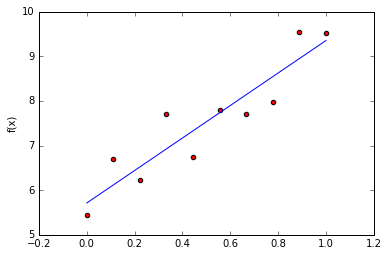

In [351]:
res = [f1(z) for z in x]
plt.scatter(x,y,c='r')
plt.plot(x,res)
plt.ylabel('f(x)')

In [352]:
resolution = 200
eps = np.abs(max(np.ravel(f1.theta_hist)))

o_x = np.linspace( f1.theta[0]-eps,f1.theta[0]+eps, num=resolution)
o_y = np.linspace( f1.theta[1]-eps,f1.theta[1]+eps, num=resolution)
X, Y = np.meshgrid(o_x, o_y)

# CF = lambda x,y,theta: np.abs(np.mean([y - np.dot(theta,x_) ]))

def cost_func(x,y,theta):
    a = y - np.dot(theta,x_)
    return 1./len(a)*np.sum(z**2 for z in a)

x_ = np.vstack([np.ones_like(x),x])

Z = np.array([ cost_func(x_,y,[p1,p0]) for p0 in o_x for p1 in o_y]).reshape(o_x.size,o_y.size)

In [353]:
p0s = [f1.theta_hist[i][0] for i in range(len(f1.theta_hist)) if i % 20 == 0]
p1s = [f1.theta_hist[i][1] for i in range(len(f1.theta_hist)) if i % 20 == 0]

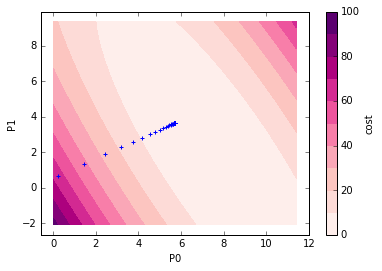

In [354]:
CS = plt.contourf(X, Y, Z, 10,
                  cmap=plt.cm.RdPu,
                  origin='lower')
plt.scatter(p0s, p1s, marker=u'+')
plt.xlabel('P0')
plt.ylabel('P1')

cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('cost')

plt.show()